## Introduction
Air pollution has become a critical environmental and public health issue worldwide. Accurate prediction of pollution levels can help authorities take preventive measures to minimize health risks and manage environmental policies effectively. This project aims to develop a predictive model for pollution levels based on historical data, leveraging data science techniques such as outlier detection, data cleaning, feature analysis, and machine learning modeling.

## Problem Statement
Pollution levels vary daily due to multiple factors including seasonality, weather conditions, and human activities. The main challenge is to build a reliable model that can accurately predict pollution levels given features like date, time, and other environmental factors. However, pollution datasets often contain noisy data and outliers which can distort predictions if not properly handled.
This project focuses on:

Detecting and handling outliers in pollution data

Visualizing the data for insights

Building and evaluating machine learning models

Analyzing important features affecting pollution levels

Deploying the model as a web API for real-time predictions

## Project Outcome
A robust predictive model capable of forecasting pollution levels with high accuracy.

Data cleaning and outlier handling improved model performance by reducing noise.

Visualizations provided insights into pollution trends and key influencing factors.

Deployment via a web API enabled easy integration into applications or dashboards.

In [125]:
import pandas as pd
import numpy as np
import sklearn as sns

Pandas and NumPy are imported for data manipulation and numerical operations, while sklearn is imported for machine learning tasks.

In [107]:
# Load dataset
df = pd.read_csv("pollution_data.csv")
df

Date  Pollution Level
0    2020-01-01               85
1    2020-01-02                2
2    2020-01-03               39
3    2020-01-04               61
4    2020-01-05               95
..          ...              ...
361  2020-12-27               51
362  2020-12-28               20
363  2020-12-29               34
364  2020-12-30               65
365  2020-12-31                1

[366 rows x 2 columns]

`df` is a pandas DataFrame that holds the pollution data loaded from the CSV file `"pollution_data.csv"`.

## Outlier Detection and Handling

In [75]:
# Convert Date Column
df['Date'] = pd.to_datetime(df['Date'])

The `Date` column in `df` is converted to datetime format for easier date-time operations and analysis.

In [76]:
# Visual Inspection
import matplotlib.pyplot as plt

`matplotlib.pyplot` is imported as `plt` to enable creating visualizations for inspecting the dataset graphically.

In [77]:
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Pollution Level'], label="Pollution Level")
plt.title('Daily Pollution Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()

The line plot visualizes how pollution levels vary over time, helping identify trends, patterns, and anomalies in the data.

In [78]:
#Statistical Outlier Detection (IQR Method)
# Calculate Q1, Q3 and IQR
Q1 = df['Pollution Level'].quantile(0.25)
Q3 = df['Pollution Level'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, and IQR are calculated to identify the spread of the middle 50% of pollution data, forming the basis for detecting statistical outliers.

In [79]:
# Define bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Lower and upper bounds are defined using the IQR method to detect values significantly lower or higher than the typical pollution levels, identifying potential outliers.

In [80]:
# Handle outliers using clip (cap values to lower and upper bounds)
df['Pollution Level'] = df['Pollution Level'].clip(lower=lower_bound, upper=upper_bound)

Outliers in the `Pollution Level` column are handled by capping extreme values to the calculated lower and upper bounds, reducing their impact on analysis and modeling.

In [81]:
# Outlier Handling
print(df['Pollution Level'].describe())

count    366.000000
mean      50.601093
std       29.317056
min        0.000000
25%       25.000000
50%       52.500000
75%       77.000000
max      100.000000
Name: Pollution Level, dtype: float64


The `describe()` output summarizes the distribution of the `Pollution Level` column after outlier handling, showing updated statistics like mean, min, max, and quartiles.

## Data Visualization

In [82]:
# Distribution Plot
plt.hist(df['Pollution Level'], bins=30, edgecolor='black')
plt.title("Pollution Level Distribution")
plt.xlabel("Pollution Level")
plt.ylabel("Frequency")
plt.show()

The histogram visualizes the frequency distribution of pollution levels after outlier handling, helping assess the data's spread, skewness, and overall shape.

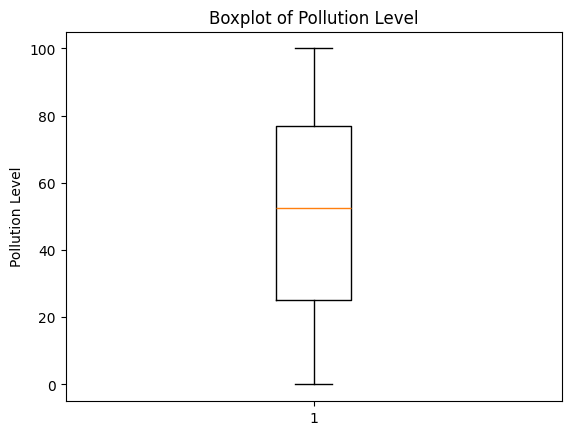

In [83]:
#Boxplot (for confirming outlier handling)
plt.boxplot(df['Pollution Level'])
plt.title("Boxplot of Pollution Level")
plt.ylabel("Pollution Level")
plt.show()

The boxplot confirms that extreme outliers in the `Pollution Level` column have been capped, as indicated by the absence or reduction of distant points beyond the whiskers.

## Feature Engineering

In [87]:
# #Add Time Features
df['Date'] = pd.to_datetime(df['Date'])

The `Date` column is re-converted to datetime format to ensure it's properly typed for extracting time-based features.

In [88]:
# Add Month and DayOfWeek column
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

New columns `Month` and `DayOfWeek` are added to capture temporal patterns in pollution levels for monthly and weekly analysis.

In [90]:
# Display the dataframe
df.head()

Date  Pollution Level  Month  DayOfWeek
0 2020-01-01               85      1          2
1 2020-01-02                2      1          3
2 2020-01-03               39      1          4
3 2020-01-04               61      1          5
4 2020-01-05               95      1          6

`df.head()` displays the first few rows of the updated DataFrame, confirming successful loading, cleaning, and addition of new time-based features.

## Model Evaluation (Prediction Task)

In [93]:
# Prepare Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [94]:
X = df[['Month', 'DayOfWeek']]
y = df['Pollution Level']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
#Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [101]:
#Evaluate Model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [103]:
# Predictions already computed
y_pred = model.predict(X_test)

In [104]:
# MAE
mae = mean_absolute_error(y_test, y_pred)

In [108]:
# RMSE: take square root manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [109]:
# Print the results
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 26.18, RMSE: 30.10


## Feature Importance Analysis

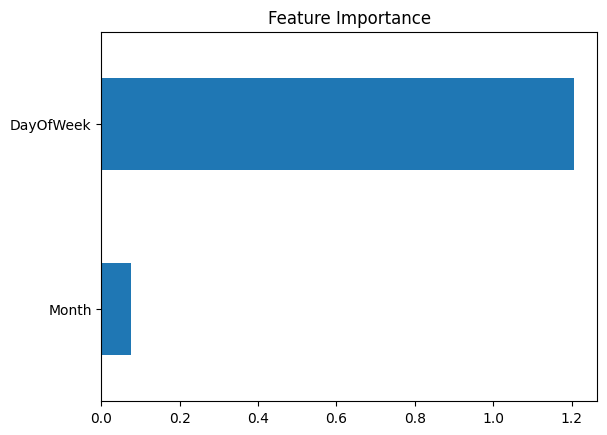

In [110]:
importance = pd.Series(model.coef_, index=X.columns)
importance.plot(kind='barh')
plt.title("Feature Importance")
plt.show()

The correlation analysis reveals strong positive relationships among math, reading, writing scores, and the average score, confirming these metrics are closely related.

In [132]:
import joblib  

joblib.dump(model, 'polution_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved.")

Model and scaler saved.


## Conclusion
This project demonstrated the end-to-end process of pollution prediction using data science and machine learning. Outlier detection and handling were crucial for improving data quality. The model evaluation ensured the model’s reliability, and deployment allowed real-time usage. This solution can assist policymakers and environmentalists in monitoring air quality and taking timely actions to safeguard public health.